Accuracy of the clustering: 0.97

Confusion Matrix:
[[151   0   0]
 [ 11  57   0]
 [  0   0 123]]

Classification Report:
                                           precision    recall  f1-score   support

      Adelie Penguin (Pygoscelis adeliae)       0.93      1.00      0.96       151
Chinstrap penguin (Pygoscelis antarctica)       1.00      0.84      0.91        68
        Gentoo penguin (Pygoscelis papua)       1.00      1.00      1.00       123

                                 accuracy                           0.97       342
                                macro avg       0.98      0.95      0.96       342
                             weighted avg       0.97      0.97      0.97       342



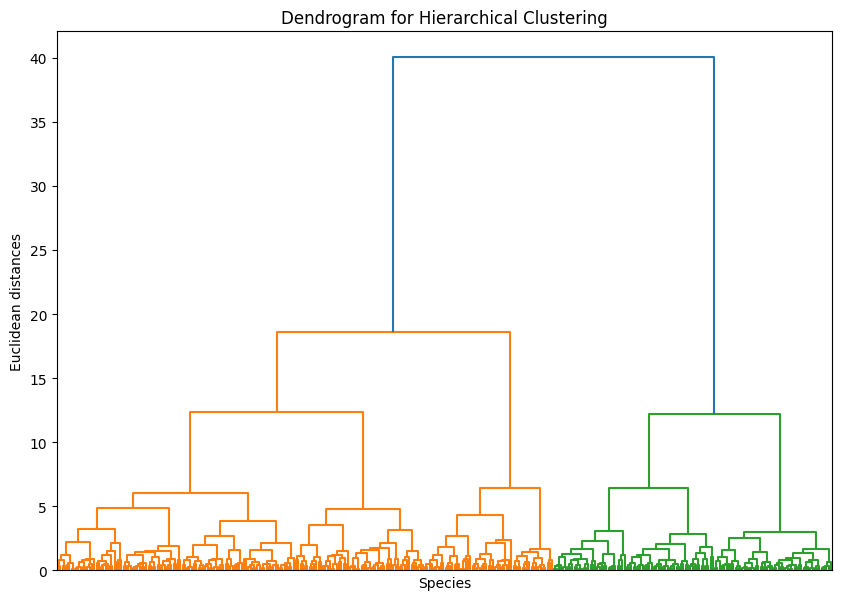

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Filter out future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load the dataset
data = pd.read_csv('/content/penguins_lter.csv')  # Ensure the path to your dataset is correct

# Clean the dataset (dropping rows with missing values)
cleaned_data = data.dropna(subset=['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']).copy()

# Select features for clustering
features = cleaned_data[['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply Hierarchical Clustering
hierarchical_clustering = AgglomerativeClustering(n_clusters=3)  # Assuming there are 3 species
cleaned_data['Cluster'] = hierarchical_clustering.fit_predict(features_scaled)

# Mapping clusters to original species for classification
species_to_cluster = {}
for cluster in range(3):
    # Get the species for the current cluster
    most_common_species = cleaned_data[cleaned_data['Cluster'] == cluster]['Species'].mode()[0]
    species_to_cluster[cluster] = most_common_species

# Create labels for classification
cleaned_data['Predicted Species'] = cleaned_data['Cluster'].map(species_to_cluster)

# Prepare data for classification
y_true = cleaned_data['Species'].values
y_pred = cleaned_data['Predicted Species'].values

# Evaluate the model
accuracy = accuracy_score(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)

# Display results
print(f"Accuracy of the clustering: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)

# Display classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred))

# Dendrogram Visualization
plt.figure(figsize=(10, 7))
linked = linkage(features_scaled, method='ward')  # You can choose different methods like 'single', 'complete', etc.
dendrogram(linked,
           orientation='top',
           labels=cleaned_data['Species'].values,
           distance_sort='descending',
           show_leaf_counts=False)  # Set to False to remove leaf counts
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Species')
plt.ylabel('Euclidean distances')
plt.xticks([])  # Remove x-axis tick labels
plt.show()
